<a href="https://colab.research.google.com/github/PaulD10/image_gen/blob/main/Condorcet_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving THEDATAFRAME.xlsx to THEDATAFRAME.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df_PP = pd.read_excel("THEDATAFRAME.xlsx",header = 1)

In [ ]:
df_PP

,Anna Agueb-Porterie,Anne Hidalgo,Yannick Jadot,Pierre Larrouturou,Charlotte Marchandise,Jean-Luc Mélenchon,Christiane Taubira
0,3,2,1,3,3,2,2
1,2,4,3,2,2,3,2
2,2,5,3,2,2,5,3
3,5,5,5,5,5,5,1
4,5,5,5,5,5,1,5
...,...,...,...,...,...,...,...
392733,3,4,4,2,1,4,5
392734,4,2,1,4,4,2,2
392735,5,3,2,4,5,1,1
392736,4,3,2,3,3,3,2


In [ ]:
df_OW = pd.read_csv("https://raw.githubusercontent.com/PaulD10/statapp/main/JM_Candidats.csv?token=GHSAT0AAAAAACBWDA7QQHCCFCEDK2W77HD6ZC43CKQ").set_index('ID')

In [ ]:
df_OW


,Nathalie Arthaud,Philippe Poutou,Fabien Roussel,Jean-Luc Mélenchon,Anne Hidalgo,Yannick Jadot,Emmanuel Macron,Valérie Pécresse,Jean Lassalle,Nicolas Dupont-Aignan,Éric Zemmour,Marine Le Pen
ID,,,,,,,,,,,,
1.0,6,5,6,6,6,6,6,6,6,6,6,6
2.0,0,0,0,0,0,0,5,2,0,0,0,0
3.0,0,0,1,0,0,0,5,2,0,0,0,0
4.0,1,1,1,2,1,3,2,1,3,2,1,6
5.0,1,1,0,4,0,5,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1085.0,0,0,0,0,0,0,2,6,0,0,0,0
1086.0,1,1,1,1,1,1,3,2,1,1,0,4
1087.0,1,1,1,5,1,1,0,1,1,0,0,0


In [ ]:
#Matrice de face à face, matrice de preferences et Condorcet

def matrix_condorcet_OW(df):
    # Calculate the matrix of scores
    df_arr = df.values
    scores = ((df_arr[:, :, None] > df_arr[:, None, :]) * 1).sum(axis=0)
    
    # Generate the preference matrix
    matrice_pref = pd.DataFrame(scores, columns=liste_candidats, index=liste_candidats)

    # Sort the preference matrix and return the heatmap
    matrice_pref = matrice_pref.loc[matrice_pref.sum().sort_values(ascending=False).index, :]
    rows = matrice_pref.index
    matrice_pref = matrice_pref.reindex(columns=rows, index=rows)
    #heat_map = sns.heatmap(matrice_pref, linewidth=1, annot=True)
    #fig = px.imshow(matrice_pref)
    #fig.show()

    M = scores.astype(float)
    M[M > 0] = M[M > 0] / (M[M > 0] + 1)
    M[M == 0] = 0.5

    np.fill_diagonal(M, 1)

    M[M > M.T] = 1
    M[M < M.T] = 0
    M[M == M.T] = 0.5


    matrice_faf = pd.DataFrame(M, columns=liste_candidats, index=liste_candidats)
    matrice_faf = matrice_faf.loc[matrice_faf.sum().sort_values(ascending=False).index, :]
    rows = matrice_faf.index
    matrice_faf = matrice_faf.reindex(columns=rows, index=rows)
    #heat_map = sns.heatmap(matrice_faf, linewidth=1, annot=True)  

    fig = px.imshow(matrice_faf)
    fig.show()

    df_condorcet = matrice_faf.copy()
    # Ajout des projets et du classement selon la méthode de Lull
    df_score = pd.DataFrame(13 - (np.sum(matrice_faf, axis=1) - 0.5 + 1), columns=["Score de Lull"])
    


    noms_candidats = {
        1: 'Nathalie Arthaud',
        2: 'Philippe Poutou',
        3: 'Fabien Roussel',
        4: 'Jean-Luc Mélenchon',
        5: 'Anne Hidalgo',
        6: 'Yannick Jadot',
        7: 'Emmanuel Macron',
        8: 'Valérie Pécresse',
        9: 'Jean Lassalle',
        10: 'Nicolas Dupont-Aignan',
        11: 'Éric Zemmour',
        12: 'Marine Le Pen'
    }

    # Utiliser une expression de compréhension de liste pour récupérer les noms des candidats dans l'ordre de classement
    df_JM = jugement_majoritaire_OW(df)
    df_JM = df_JM["JM"]
    df_score = pd.concat([df_score,df_JM], axis = 1).astype(int)
    df_score = df_score.iloc[::-1]

    #sum_prefs = scores + scores.T
    #matrice_borda = np.divide(scores,sum_prefs,where = sum_prefs != 0)
    borda_scores = pd.DataFrame(np.sum(matrice_pref, axis=0), index=liste_candidats, columns=['Borda'])
    df_score["Borda"] = borda_scores["Borda"].rank(ascending = True)
    #print(borda_scores)
    fig = px.imshow(matrice_pref)
    fig.show()


    df_liste = df.values.tolist()
    classement_notation = calculer_classement_notation_OW(df_liste)
    classement_noms = [noms_candidats[chiffre] for chiffre in classement_notation]
    data = {'Notation': list(reversed(range(len(classement_noms)))), 'Candidate': classement_noms}
    notation_OW = pd.DataFrame(data).set_index("Candidate")

    df_score = pd.concat([df_score,notation_OW], axis = 1).astype(int)
    df_score["Notation"] = 12 - df_score["Notation"]

    return df_score


df = df_OW.copy()
liste_candidats = list(df.columns)
score_OW =  matrix_condorcet_OW(df)


In [ ]:
print(score_OW)

                       Score de Lull  JM  Borda  Notation
Emmanuel Macron                    1   1      1         1
Marine Le Pen                      2   2      4         2
Valérie Pécresse                   3   3      2         3
Jean-Luc Mélenchon                 4   4      3         4
Fabien Roussel                     5   5      5         6
Yannick Jadot                      6   6      6         5
Jean Lassalle                      7   7      7         7
Nicolas Dupont-Aignan              8   8      8         8
Anne Hidalgo                       9   9      9        10
Philippe Poutou                   10  10     10        11
Nathalie Arthaud                  11  11     11        12
Éric Zemmour                      12  12     12         9


In [ ]:
def matrix_condorcet_PP(df):
    # Calculate the matrix of scores
    df_arr = df.values
    scores = ((df_arr[:, :, None] > df_arr[:, None, :]) * 1).sum(axis=0)
    
    # Generate the preference matrix
    matrice_pref = pd.DataFrame(scores, columns=liste_candidats, index=liste_candidats)

    # Sort the preference matrix and return the heatmap
    matrice_pref = matrice_pref.loc[matrice_pref.sum().sort_values(ascending=False).index, :]
    rows = matrice_pref.index
    matrice_pref = matrice_pref.reindex(columns=rows, index=rows)
    #heat_map = sns.heatmap(matrice_pref, linewidth=1, annot=True)
    #fig = px.imshow(matrice_pref)
    #fig.show()

    M = scores.astype(float)
    M[M > 0] = M[M > 0] / (M[M > 0] + 1)
    M[M == 0] = 0.5

    np.fill_diagonal(M, 1)

    M[M > M.T] = 1
    M[M < M.T] = 0
    M[M == M.T] = 0.5


    matrice_faf = pd.DataFrame(M, columns=liste_candidats, index=liste_candidats)
    matrice_faf = matrice_faf.loc[matrice_faf.sum().sort_values(ascending=False).index, :]
    rows = matrice_faf.index
    matrice_faf = matrice_faf.reindex(columns=rows, index=rows)
    #heat_map = sns.heatmap(matrice_faf, linewidth=1, annot=True)  

    #fig = px.imshow(matrice_faf)
    #fig.show()

    df_condorcet = matrice_faf.copy()
    # Ajout des projets et du classement selon la méthode de Lull
    df_score = pd.DataFrame((np.sum(matrice_faf, axis=1) - 0.5 + 1), columns=["Score de Lull"])
    
    jm = jugement_majoritaire_PP(df)

    noms_candidats = {
        1: 'Anna Agueb-Porterie',
        2: 'Anne Hidalgo',
        3: 'Yannick Jadot',
        4: 'Pierre Larrouturou',
        5: 'Charlotte Marchandise',
        6: 'Jean-Luc Mélenchon',
        7: 'Christiane Taubira'
    }

    # Utiliser une expression de compréhension de liste pour récupérer les noms des candidats dans l'ordre de classement
    df_JM = jugement_majoritaire_PP(df)
    df_JM = df_JM["JM"]
    df_score = pd.concat([df_score,df_JM], axis = 1).astype(int)
    df_score = df_score.iloc[::-1]

    #sum_prefs = scores + scores.T
    matrice_borda = np.divide(scores,sum_prefs,where = sum_prefs != 0)
    borda_scores = pd.DataFrame(np.sum(matrice_borda, axis=0), index=liste_candidats, columns=['Borda'])
    df_score["Borda"] = borda_scores["Borda"].rank(ascending = False)

    df_liste = df.values.tolist()
    classement_notation = calculer_classement_notation_PP(df_liste)
    classement_noms = [noms_candidats[chiffre] for chiffre in classement_notation]
    data = {'Notation': list((range(len(classement_noms)))), 'Candidate': classement_noms}
    notation_PP = pd.DataFrame(data).set_index("Candidate")

    df_score = pd.concat([df_score,notation_PP], axis = 1).astype(int)
    df_score["Notation"] = 1 + df_score["Notation"]

    

    return df_score


df = df_PP.copy()
liste_candidats = list(df.columns)
score_PP =  matrix_condorcet_PP(df)
print(score_PP)

                       Score de Lull  JM  Borda  Notation
Anna Agueb-Porterie                7   7      7         7
Charlotte Marchandise              6   6      6         6
Anne Hidalgo                       5   5      5         5
Pierre Larrouturou                 4   4      4         4
Jean-Luc Mélenchon                 3   3      3         3
Yannick Jadot                      2   2      2         2
Christiane Taubira                 1   1      1         1


In [ ]:
print(score_PP)

                       Score de Lull  JM  Borda  Notation
Anna Agueb-Porterie                7   7      7         7
Charlotte Marchandise              6   6      6         6
Anne Hidalgo                       5   5      5         5
Pierre Larrouturou                 4   4      4         4
Jean-Luc Mélenchon                 3   3      3         3
Yannick Jadot                      2   2      2         2
Christiane Taubira                 1   1      1         1


In [ ]:
def dichotomie_OW(df,candidat,condition): 
  low = 0
  high = 4000
  result_list = []
  while low <= high:
          # Find the midpoint of the range
    mid = (low + high) // 2
          # Create a new DataFrame with the additional votes for the candidate
    df_new = pd.DataFrame(0, index=range(mid), columns=df.columns)      
    df_new[candidat] = 6
    df_extended = pd.concat([df, df_new], axis=0)
          # Compute the pairwise comparison matrix
    df_score = matrix_condorcet_OW(df_extended)
          # Check if the candidate score is 1
    if df_score.loc[candidat, condition ] == 1:
              # Add the number of voters to the result list
        result_list.append(mid)
              # Update the range to search the lower half
        high = mid - 1
    else:
              # Update the range to search the upper half
        low = mid + 1

  return result_list


def robustesse_OW(df):
    liste_candidats = list(df.columns)
    ls = pd.DataFrame(columns = ["Candidat","robust_Condorcet","robust_JM","robust_Borda","robust_Notation"])
    # Define the candidate of interest

    for candidat in liste_candidats:
      result_list = dichotomie_OW(df,candidat,"Score de Lull")
      result_list_JM = dichotomie_OW(df,candidat,"JM")
      result_list_B = dichotomie_OW(df,candidat,"Borda")
      result_list_N = dichotomie_OW(df,candidat,"Notation")
      
      # Return the minimum number of voters needed for the candidate to have a score of 1
      new_row = pd.DataFrame({"Candidat": candidat, "robust_Condorcet": [min(result_list)],"robust_JM": [min(result_list_JM)],"robust_Borda": [min(result_list_B)],"robust_Notation": [min(result_list_N)]})

      ls = pd.concat([ls,new_row],ignore_index=True)
    ls = ls.set_index("Candidat") 
    return ls


df = df_OW.copy()
robustesse_OW = robustesse_OW(df)
robustesse_OW

KeyboardInterrupt: ignored

In [ ]:
df_OW

,Nathalie Arthaud,Philippe Poutou,Fabien Roussel,Jean-Luc Mélenchon,Anne Hidalgo,Yannick Jadot,Emmanuel Macron,Valérie Pécresse,Jean Lassalle,Nicolas Dupont-Aignan,Éric Zemmour,Marine Le Pen
ID,,,,,,,,,,,,
1.0,6,5,6,6,6,6,6,6,6,6,6,6
2.0,0,0,0,0,0,0,5,2,0,0,0,0
3.0,0,0,1,0,0,0,5,2,0,0,0,0
4.0,1,1,1,2,1,3,2,1,3,2,1,6
5.0,1,1,0,4,0,5,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1085.0,0,0,0,0,0,0,2,6,0,0,0,0
1086.0,1,1,1,1,1,1,3,2,1,1,0,4
1087.0,1,1,1,5,1,1,0,1,1,0,0,0


In [ ]:
df = df_OW.copy()
liste_candidats = list(df_OW.columns)
def mention_max(candidat):
  df = df_OW.copy()
  # Create a boolean mask for rows where only one column has the value 6 and it is in the specified column (i)
  mask_single_6_in_i = (np.sum(df == 6, axis=1) == 1) & (df.loc[:, candidat] == 6)

  # Filter the DataFrame using the boolean mask and replace the values in the filtered rows
  #df_filtered = df.copy()
  #df_filtered.loc[mask_single_6_in_i, :] = np.where(df_filtered.loc[mask_single_6_in_i, :].values == 6, 6, 0)
  a = int(df[mask_single_6_in_i].shape[0])
  return a
liste = []
for candidat in liste_candidats:
  df = df_OW.copy()
  liste.append(candidat)
  hop = mention_max(candidat)
  liste.append(hop)
  data_array = [liste[i:i+2] for i in range(0, len(liste), 2)]

  # Create a DataFrame from the reshaped data
  data_mention_max = pd.DataFrame(data_array, columns=['Candidat', 'Nombre électeurs mention max'])

data_mention_max

#Bah y a pas assez de gens en mention maximale pour changer quoi que ce soit où que ce soit, ce qui était prévisible sur OW.

,Candidat,Nombre électeurs mention max
0,Nathalie Arthaud,0
1,Philippe Poutou,1
2,Fabien Roussel,3
3,Jean-Luc Mélenchon,31
4,Anne Hidalgo,2
5,Yannick Jadot,5
6,Emmanuel Macron,72
7,Valérie Pécresse,19
8,Jean Lassalle,6
9,Nicolas Dupont-Aignan,2


In [ ]:
import pandas as pd
import numpy as np

df = df_OW.copy()
liste_candidats = list(df_OW.columns)

def mention_sup(candidat):
    df = df_OW.copy()
    mask = np.greater(df[candidat], np.max(df.iloc[:, :df.columns.get_loc(candidat)], axis=1))
    filtered_df = df[mask]

    # Filter columns where there is at least one True value
    mask_columns = np.any(filtered_df > 0, axis=0)
    filtered_df = filtered_df.loc[:, mask_columns]

    return filtered_df.shape[0]


liste = []
for candidat in liste_candidats:
  df = df_OW.copy()
  liste.append(candidat)
  hop = mention_sup(candidat)
  liste.append(hop)
  data_array = [liste[i:i+2] for i in range(0, len(liste), 2)]

  # Create a DataFrame from the reshaped data
  data_mention_sup = pd.DataFrame(data_array, columns=['Candidat', 'Nombre électeurs mention sup'])

data_mention_sup

,Candidat,Nombre électeurs mention sup
0,Nathalie Arthaud,0
1,Philippe Poutou,193
2,Fabien Roussel,330
3,Jean-Luc Mélenchon,303
4,Anne Hidalgo,94
5,Yannick Jadot,113
6,Emmanuel Macron,407
7,Valérie Pécresse,110
8,Jean Lassalle,65
9,Nicolas Dupont-Aignan,66


In [ ]:
def mention_distinctive(candidat):
    df = df_OW.copy()
    mask = np.greater_equal(df[candidat], np.max(df.iloc[:, :df.columns.get_loc(candidat)], axis=1) + 2)
    filtered_df = df[mask]

    # Filter columns where there is at least one True value
    mask_columns = np.any(filtered_df > 0, axis=0)
    filtered_df = filtered_df.loc[:, mask_columns]

    return filtered_df.shape[0]
liste = []
for candidat in liste_candidats:
  df = df_OW.copy()
  liste.append(candidat)
  hop = mention_distinctive(candidat)
  liste.append(hop)
  data_array = [liste[i:i+2] for i in range(0, len(liste), 2)]

  # Create a DataFrame from the reshaped data
  data_mention_distinctive = pd.DataFrame(data_array, columns=['Candidat', 'Nb "mention distinctive"'])

data_mention_distinctive.set_index("Candidat")
data_mention_distinctive.to_latex(index = False, column_format='r' ,caption='Nombre de bulletins de vote répondant aux critères de transformation de la mention distinctive', label='tab:nbMentionDistinctive')

<ipython-input-161-bdf72388e762>:23: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



'\\begin{table}\n\\centering\n\\caption{Nombre de bulletins de vote répondant aux critères de transformation de la mention distinctive}\n\\label{tab:nbMentionDistinctive}\n\\begin{tabular}{r}\n\\toprule\n             Candidat &  Nb "mention distinctive" \\\\\n\\midrule\n     Nathalie Arthaud &                         0 \\\\\n      Philippe Poutou &                        56 \\\\\n       Fabien Roussel &                       165 \\\\\n   Jean-Luc Mélenchon &                       155 \\\\\n         Anne Hidalgo &                        34 \\\\\n        Yannick Jadot &                        37 \\\\\n      Emmanuel Macron &                       291 \\\\\n     Valérie Pécresse &                        64 \\\\\n        Jean Lassalle &                        35 \\\\\nNicolas Dupont-Aignan &                        29 \\\\\n         Éric Zemmour &                        47 \\\\\n        Marine Le Pen &                        68 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [ ]:
def dichotomie_PP(df,candidat,condition): 
  low = 0
  high = 600000
  result_list = []
  while low <= high:
          # Find the midpoint of the range
    mid = (low + high) // 2
          # Create a new DataFrame with the additional votes for the candidate
    df_new = pd.DataFrame(5, index=range(mid), columns=df.columns)      
    df_new[candidat] = 1
    df_extended = pd.concat([df, df_new], axis=0)
          # Compute the pairwise comparison matrix
    df_score = matrix_condorcet_PP(df_extended)
          # Check if the candidate score is 1
    if df_score.loc[candidat, condition ] == 1:
              # Add the number of voters to the result list
        result_list.append(mid)
              # Update the range to search the lower half
        high = mid - 1
    else:
              # Update the range to search the upper half
        low = mid + 1

  return result_list



def robustesse_PP(df):
    liste_candidats = list(df.columns)
    ls = pd.DataFrame(columns = ["Candidat","robust_Condorcet","robust_JM","robust_Borda","robust_Notation"])
    # Define the candidate of interest

    for candidat in liste_candidats:
      result_list,result_list_JM = dichotomie_PP(df,candidat,"Score de Lull"), dichotomie_PP(df,candidat,"JM")
      result_list_B, result_list_N = dichotomie_PP(df,candidat,"Borda"), dichotomie_PP(df,candidat,"Notation")
      
      # Return the minimum number of voters needed for the candidate to have a score of 1
      new_row = pd.DataFrame({"Candidat": candidat, "robust_Condorcet": [min(result_list)],"robust_JM": [min(result_list_JM)],"robust_Borda": [min(result_list_B)],"robust_Notation": [min(result_list_N)]})
      ls = pd.concat([ls,new_row],ignore_index=True)
    ls = ls.set_index("Candidat") 
    return ls


df = df_PP.copy()
robustesse_PP = robustesse_PP(df)
print(robustesse_PP)

                      robust_Condorcet robust_JM robust_Borda robust_Notation
Candidat                                                                     
Anna Agueb-Porterie             270403    224735       429207          188559
Anne Hidalgo                    237104    187473       350278          149582
Yannick Jadot                   117527    109337       143646           69380
Pierre Larrouturou              179169    155220       255357          126587
Charlotte Marchandise           257883    216346       392378          178179
Jean-Luc Mélenchon              154498    113555       272496          101363
Christiane Taubira                   0         0            0               0


In [ ]:
data = {
    'robust_Condorcet': [270403, 237104, 117527, 179169, 257883, 154498, 0],
    'robust_JM': [224735, 187473, 109337, 155220, 216346, 113555, 0],
    'robust_Borda': [429207, 350278, 143646, 255357, 392378, 272496, 0],
    'robust_Notation': [188559, 149582, 69380, 126587, 178179, 101363, 0]
}

index = ['Anna Agueb-Porterie', 'Anne Hidalgo', 'Yannick Jadot', 'Pierre Larrouturou', 'Charlotte Marchandise', 'Jean-Luc Mélenchon', 'Christiane Taubira']

robustesse_PP = pd.DataFrame(data=data, index=index)
robustesse_PP

,robust_Condorcet,robust_JM,robust_Borda,robust_Notation
Anna Agueb-Porterie,270403,224735,429207,188559
Anne Hidalgo,237104,187473,350278,149582
Yannick Jadot,117527,109337,143646,69380
Pierre Larrouturou,179169,155220,255357,126587
Charlotte Marchandise,257883,216346,392378,178179
Jean-Luc Mélenchon,154498,113555,272496,101363
Christiane Taubira,0,0,0,0


In [ ]:
mega_PP = pd.concat([robustesse_PP,score_PP],axis = 1)
print(mega_PP)

                       robust_Condorcet  robust_JM  robust_Borda  \
Anna Agueb-Porterie              270403     224735        429207   
Anne Hidalgo                     237104     187473        350278   
Yannick Jadot                    117527     109337        143646   
Pierre Larrouturou               179169     155220        255357   
Charlotte Marchandise            257883     216346        392378   
Jean-Luc Mélenchon               154498     113555        272496   
Christiane Taubira                    0          0             0   

                       robust_Notation  Score de Lull  JM  Borda  Notation  
Anna Agueb-Porterie             188559              7   7      7         7  
Anne Hidalgo                    149582              5   5      5         5  
Yannick Jadot                    69380              2   2      2         2  
Pierre Larrouturou              126587              4   4      4         4  
Charlotte Marchandise           178179              6   6      6      

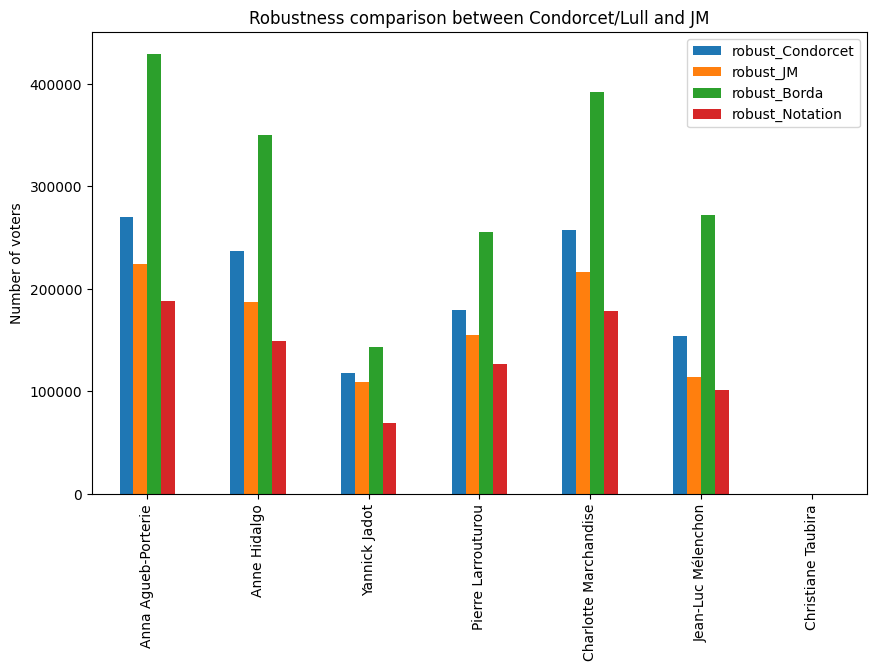

In [ ]:
ax = mega_PP[['robust_Condorcet', 'robust_JM',"robust_Borda","robust_Notation"]].plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Number of voters')
ax.set_title('Robustness comparison between Condorcet/Lull and JM')
plt.show()

<ipython-input-181-758f1ba5ea65>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-181-758f1ba5ea65>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



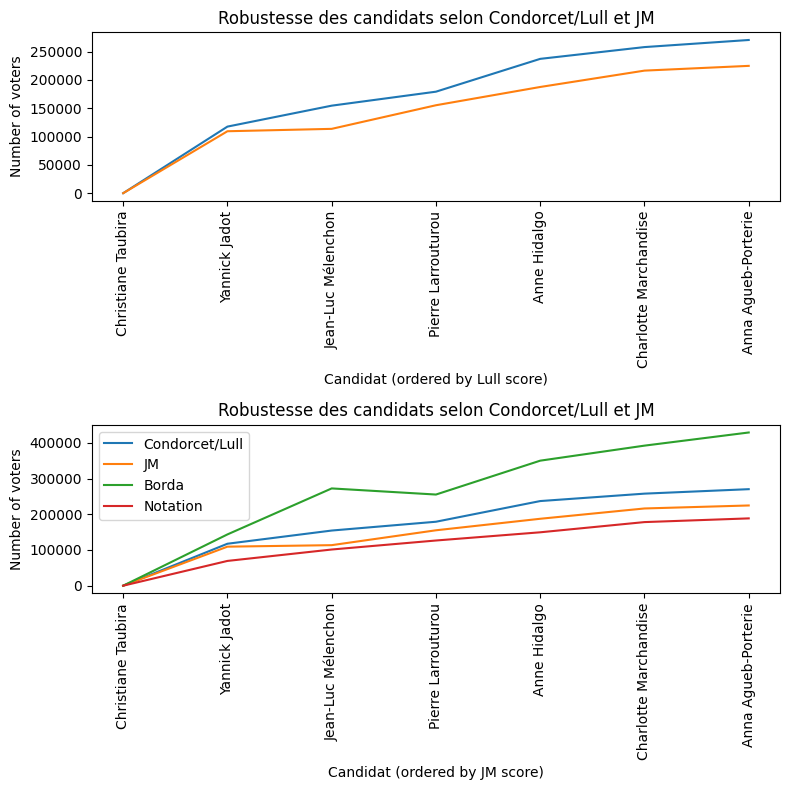

In [ ]:
df_lull = mega_PP.sort_values('Score de Lull')
df_jm = mega_PP.sort_values('JM')

# Create the line plots
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(df_lull.index, df_lull['robust_Condorcet'], label='Condorcet/Lull')
ax[0].plot(df_lull.index, df_lull['robust_JM'], label='JM')
ax[0].set_xticklabels(df_lull.index, rotation=90)
ax[0].set_xlabel('Candidat (ordered by Lull score)')
ax[0].set_ylabel('Number of voters')
ax[0].set_title('Robustesse des candidats selon Condorcet/Lull et JM')

ax[1].plot(df_jm.index, df_jm['robust_Condorcet'], label='Condorcet/Lull')
ax[1].plot(df_jm.index, df_jm['robust_JM'], label='JM')
ax[1].plot(df_jm.index, df_jm['robust_Borda'], label='Borda')
ax[1].plot(df_jm.index, df_jm['robust_Notation'], label='Notation')
ax[1].set_xticklabels(df_jm.index, rotation=90)
ax[1].set_xlabel('Candidat (ordered by JM score)')
ax[1].set_ylabel('Number of voters')
ax[1].set_title('Robustesse des candidats selon Condorcet/Lull et JM')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mega_OW = pd.concat([robustesse_OW,score_OW],axis = 1)
print(mega_OW)

                      robust_Condorcet robust_JM robust_Borda robust_Notation  \
Nathalie Arthaud                   421       385         1723             260   
Philippe Poutou                    392       375         1624             247   
Fabien Roussel                     295       274          647             175   
Jean-Luc Mélenchon                 196       170          482             119   
Anne Hidalgo                       412       304         1427             229   
Yannick Jadot                      303       273          674             175   
Emmanuel Macron                      0         0            0               0   
Valérie Pécresse                   246       184          472             119   
Jean Lassalle                      314       286         1022             185   
Nicolas Dupont-Aignan              336       286         1390             203   
Éric Zemmour                       362       313         2058             206   
Marine Le Pen               

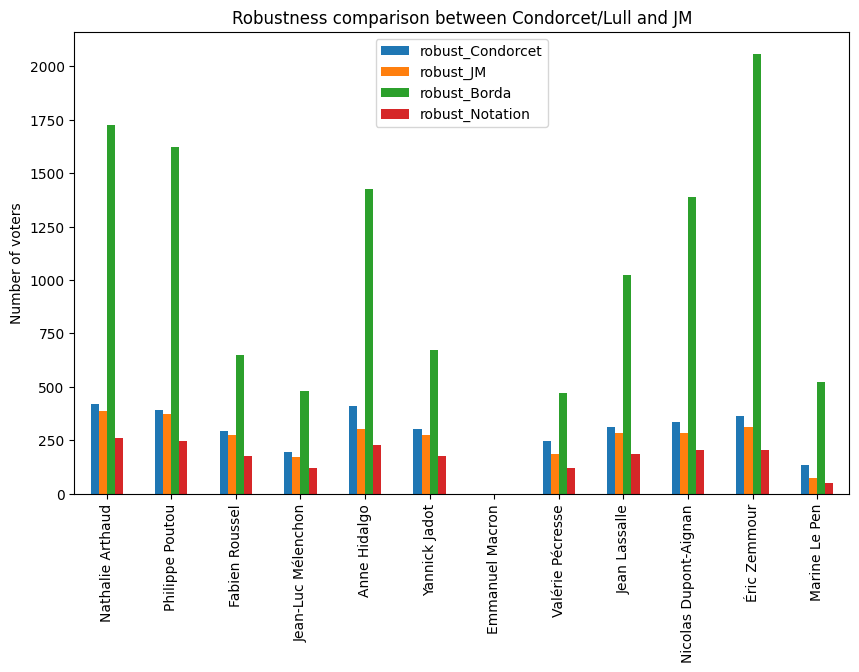

In [ ]:
ax = mega_OW[['robust_Condorcet', 'robust_JM','robust_Borda',"robust_Notation"]].plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Number of voters')
ax.set_title('Robustness comparison between Condorcet/Lull and JM')
plt.show()

<ipython-input-148-690804185ab6>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



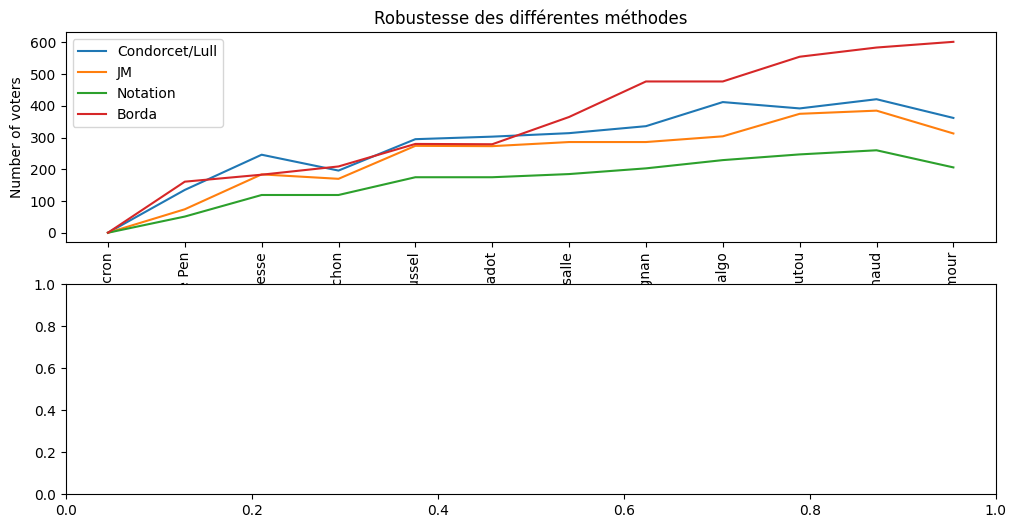

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Plot the scores for each method
ax[0].plot(df_jm.index, df_jm['robust_Condorcet'], label='Condorcet/Lull')
ax[0].plot(df_jm.index, df_jm['robust_JM'], label='JM')
ax[0].plot(df_jm.index, df_jm['robust_Notation'], label='Notation')
ax[0].plot(df_jm.index, df_jm['robust_Borda'], label='Borda')
ax[0].set_xticklabels(df_jm.index, rotation=90)
ax[0].set_xlabel('Candidat (ordered by JM score)')
ax[0].set_ylabel('Number of voters')
ax[0].set_title('Robustesse des différentes méthodes')


# Add legend to the plots
ax[0].legend()


# Show the plots
plt.show()

In [ ]:
df_lull

,robust_Condorcet,robust_JM,robust_Borda,robust_Notation,Score de Lull,JM,Borda,Notation
Emmanuel Macron,0,0,0.0,0.0,1,1,1,1
Marine Le Pen,135,74,161.0,51.0,2,2,2,2
Valérie Pécresse,246,184,183.0,119.0,3,3,3,3
Jean-Luc Mélenchon,196,170,209.0,119.0,4,4,4,4
Fabien Roussel,295,274,280.0,175.0,5,5,6,6
Yannick Jadot,303,273,279.0,175.0,6,6,5,5
Jean Lassalle,314,286,365.0,185.0,7,7,7,7
Nicolas Dupont-Aignan,336,286,477.0,203.0,8,8,8,8
Anne Hidalgo,412,304,477.0,229.0,9,9,9,10
Philippe Poutou,392,375,555.0,247.0,10,10,11,11


In [ ]:
#VOTE PAR NOTATION OW
"""
Créez une liste vide pour chaque candidat pour stocker les points attribués par les électeurs.
Pour chaque électeur, ajoutez ses notes à la liste de chaque candidat correspondant.
Calculez la somme des points pour chaque candidat à partir de leurs listes respectives.
Triez les candidats en ordre décroissant en fonction de leur score total.
Retournez le classement des candidats triés.
"""

#Selon le format du dataframe d'origine, j'ai eu besoin de supprimer la première colonne (les identifiants des électeurs)
#dfpp = dfpp.drop(columns=[dfpp.columns[0]], axis=1)

def calculer_classement_notation_OW(bulletins):
    # Créer une liste vide pour chaque candidat
    candidats_points = [[], [], [], [], [], [], [], [], [], [], [], []]
    
    # Ajouter les notes de chaque électeur à la liste correspondante pour chaque candidat
    for bulletin in bulletins:
        for i in range(12):
            candidats_points[i].append(bulletin[i])
    
    # Calculer le score total de chaque candidat
    scores = [sum(candidat) for candidat in candidats_points]
    classement = sorted(range(12), key=lambda i: scores[i], reverse=True)
    
    # Retourner le classement des candidats triés
    return [x+1 for x in classement]



In [ ]:
def calculer_classement_notation_PP(bulletins):
    # Créer une liste vide pour chaque candidat
    candidats_points = [[], [], [], [], [], [], []]
    
    # Ajouter les notes de chaque électeur à la liste correspondante pour chaque candidat
    for bulletin in bulletins:
        for i in range(7):
            candidats_points[i].append(bulletin[i])
    
    # Calculer le score total de chaque candidat
    scores = [sum(candidat) for candidat in candidats_points]
    classement = sorted(range(7), key=lambda i: scores[i], reverse=False)
    
    # Retourner le classement des candidats triés
    return [x+1 for x in classement]

In [ ]:
df = df_OW.copy()
liste_candidats = list(df.columns)

def jugement_majoritaire_OW(df):
  nb_bulletins = len(df)

  # Compter le nombre de fois où chaque candidat a reçu chaque appréciation
  count_appreciations = df.apply(pd.Series.value_counts)

  # Diviser le nombre de fois où chaque candidat a reçu chaque appréciation par le nombre total de bulletins de vote exprimés
  part_appreciations = count_appreciations / nb_bulletins

  median_scores = np.median(df, axis=0)
  above_median = df[df > median_scores].count()

  # Créer un DataFrame contenant les médianes, le nombre de votes au-dessus de la médiane, et les noms des candidats
  df_median = pd.DataFrame({"Median": median_scores, "Above Median": above_median})

  # Trier le DataFrame par ordre décroissant de médiane, puis par ordre décroissant de votes au-dessus de la médiane
  df_median = df_median.sort_values(["Median", "Above Median"], ascending=[False, False])
  df_median["JM"] = range(1,len(df_median)+1)

  return df_median
jugement_majoritaire_OW(df)

,Median,Above Median,JM
Emmanuel Macron,2.0,514,1
Marine Le Pen,2.0,441,2
Valérie Pécresse,2.0,331,3
Jean-Luc Mélenchon,1.0,511,4
Fabien Roussel,1.0,461,5
Yannick Jadot,1.0,440,6
Jean Lassalle,1.0,414,7
Nicolas Dupont-Aignan,1.0,382,8
Anne Hidalgo,1.0,361,9
Philippe Poutou,1.0,290,10


In [ ]:
df = df_PP.copy()
liste_candidats = list(df.columns)

def jugement_majoritaire_PP(df):
  nb_bulletins = len(df)

  # Compter le nombre de fois où chaque candidat a reçu chaque appréciation
  count_appreciations = df.apply(pd.Series.value_counts)

  # Diviser le nombre de fois où chaque candidat a reçu chaque appréciation par le nombre total de bulletins de vote exprimés
  part_appreciations = count_appreciations / nb_bulletins

  median_scores = np.median(df, axis=0)
  above_median = df[df < median_scores].count()

  # Créer un DataFrame contenant les médianes, le nombre de votes au-dessus de la médiane, et les noms des candidats
  df_median = pd.DataFrame({"Median": median_scores, "Above Median": above_median})

  # Trier le DataFrame par ordre décroissant de médiane, puis par ordre décroissant de votes au-dessus de la médiane
  df_median = df_median.sort_values(["Median", "Above Median"], ascending=[True, False])
  df_median["JM"] = range(1,len(df_median)+1)

  return df_median
jugement_majoritaire_PP(df)